In [1]:
import os
os.chdir('..')

In [2]:
import optuna
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error

/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
study = optuna.load_study(study_name="xgboost", storage="sqlite:///scripts/trials.db")

In [4]:
df_train = pd.read_csv('data/train_processed.csv')
X_train, y_train = df_train.drop(columns=['FULLVAL']), df_train['FULLVAL']
df_val = pd.read_csv('data/val_processed.csv')
X_val, y_val = df_val.drop(columns=['FULLVAL']), df_val['FULLVAL']

In [5]:
model = XGBRFRegressor(**study.best_trial.params)

In [6]:
model.fit(X_train, y_train)

/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[02:00:05] WARNING: ../src/learner.cc:576: 
Parameters: { "ntrees" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRFRegressor(alpha=13.622439616585376, base_score=0.5, booster='gbtree',
               colsample_bylevel=0.9984305242901684,
               colsample_bynode=0.9090951979008975,
               colsample_bytree=0.8971743620107993, enable_categorical=False,
               eta=0.015964660814947813, gamma=9160.84838155828, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               lambda=19.215110643571645, max_delta_step=0, max_depth=12,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, ntrees=1456, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=13.6224394, scale_pos_weight=1,
               subsample=0.32448108416803123, tree_method='exact',
               validate_parameters=1, ...)

In [7]:
mean_absolute_error(y_train, model.predict(X_train))

163608.21206541685

In [8]:
mean_absolute_error(y_val, model.predict(X_val))

/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


174608.5780988421

In [9]:
#import pickle as pkl

#with open('models/xgboost.pkl', 'wb') as f:
#    pkl.dump(model, f)

<BarContainer object of 123 artists>

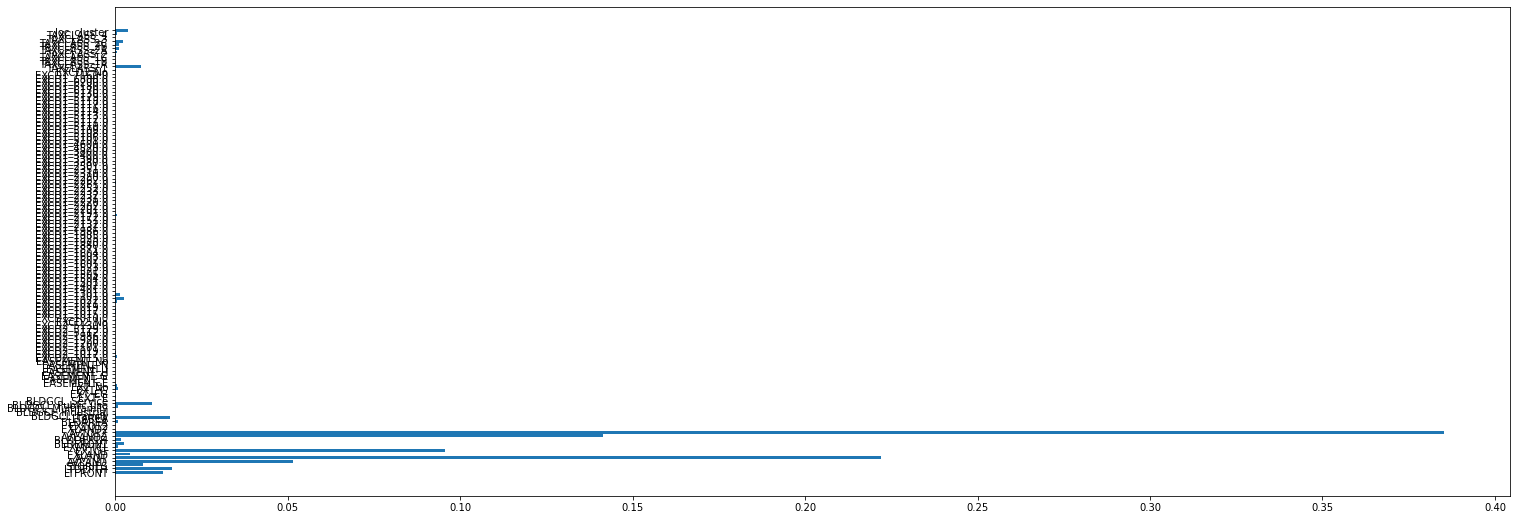

In [10]:
plt.rcParams['figure.figsize'] = (25, 9)
plt.rcParams['figure.facecolor'] = 'white'
plt.barh(y=X_train.columns, width=model.feature_importances_)

In [11]:
relevant_cols = X_train.columns[model.feature_importances_ > .0001]

with open('models/relevant_cols.pkl', 'wb') as f:
    pkl.dump(relevant_cols, f)

In [12]:
X_train = X_train[relevant_cols]
X_val = X_val[relevant_cols]

In [13]:
model = XGBRFRegressor(**study.best_trial.params)

In [14]:
model.fit(X_train, y_train)

/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[02:00:13] WARNING: ../src/learner.cc:576: 
Parameters: { "ntrees" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRFRegressor(alpha=13.622439616585376, base_score=0.5, booster='gbtree',
               colsample_bylevel=0.9984305242901684,
               colsample_bynode=0.9090951979008975,
               colsample_bytree=0.8971743620107993, enable_categorical=False,
               eta=0.015964660814947813, gamma=9160.84838155828, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               lambda=19.215110643571645, max_delta_step=0, max_depth=12,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, ntrees=1456, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=13.6224394, scale_pos_weight=1,
               subsample=0.32448108416803123, tree_method='exact',
               validate_parameters=1, ...)

In [15]:
mean_absolute_error(y_train, model.predict(X_train))

168297.66582503065

In [16]:
mean_absolute_error(y_val, model.predict(X_val))

/home/antoni/miniconda3/envs/best/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


174164.02242388044

In [17]:
with open('models/xgboost.pkl', 'wb') as f:
    pkl.dump(model, f)